In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## Get Data

In [51]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
df_kend_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
63177,1.0,0.092308,1.0,0.538462,1.0,0.5,0.495143,0.676813,0.932099,0.463668,0
108934,0.0,0.723077,1.0,0.153846,1.0,0.0,1.000000,0.607965,0.154321,0.051903,0
97182,0.0,0.430769,1.0,0.692308,1.0,0.0,1.000000,0.830330,0.759259,0.314879,0
164234,1.0,0.107692,1.0,0.230769,1.0,0.5,1.000000,0.451250,0.932099,0.930796,0
122601,0.0,0.061538,1.0,0.173077,1.0,0.5,1.000000,0.427539,0.932099,0.820069,0


## Feature Selection

C:\Users\user\AppData\Local\Temp/ipykernel_25812/2413644259.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_kend_train.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

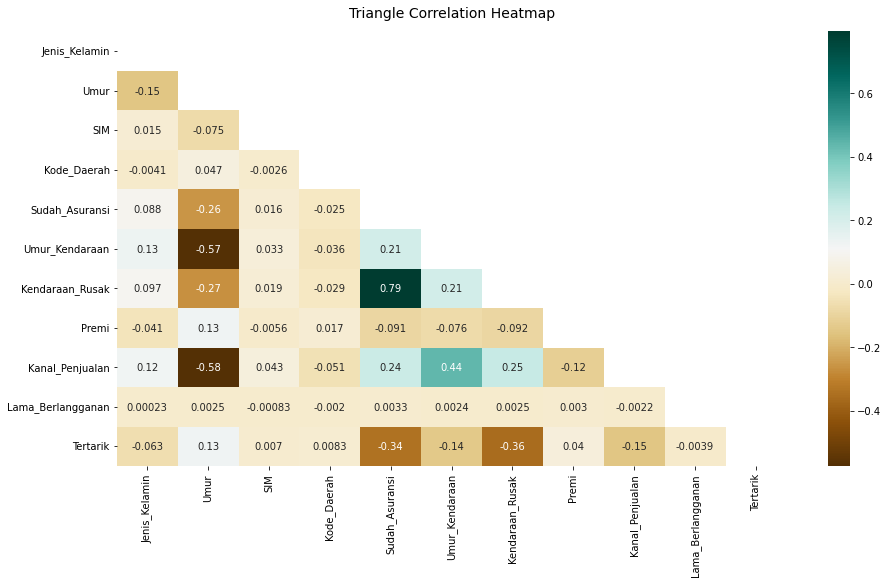

In [52]:
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_kend_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_kend_train.corr(), mask=mask, annot=True, cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 14}, pad=14)

In [53]:
df_kend_train =df_kend_train[['Umur', 'Kanal_Penjualan']]
df = df_kend_train.copy()
df.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


In [54]:
print("Total Data", len(df))

Total Data 175013


In [55]:
# menghitung Metode Euclidean untuk mencari jarak terdekat
def calcEuclidean(a, b):
  return math.sqrt(sum((a-b)**2))

def kMeans(k, max_iteration, df):  
  centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
  print(f'Inisialisasi:\n Cluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')

  tmp_centroid = centroid.copy()

  for i in range(max_iteration):
    cluster = {i: [] for i in range(k)}

    for x in df:
      dist = [calcEuclidean(x, centroid[c]) for c in centroid]
      cluster[dist.index(min(dist))].append(x)
    
    for cl in cluster:
      centroid[cl]= np.mean(cluster[cl], axis=0)
    
    print(f'Iterasi ke {i+1} \n Cluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')
    
    same = False
    for key in cluster.keys():      
      if((tmp_centroid.get(key) == centroid.get(key))[0]):
        same = True
        break
    if(same):
      break
    
    tmp_centroid = centroid.copy()
  
  return centroid, cluster



## Main

In [56]:
data = df.to_numpy()

k = 3

max_iteration = 12

centroid, cluster = kMeans(k, max_iteration, data)

Inisialisasi:
 Cluster 0: [0.38461538 0.94444444], Cluster 1: [0.56923077 0.75925926], Cluster 2: [0.21538462 0.15432099] 

Iterasi ke 1 
 Cluster 0: [0.1336964  0.89732099], Cluster 1: [0.56168947 0.74625209], Cluster 2: [0.45413855 0.14999422] 

Iterasi ke 2 
 Cluster 0: [0.11636548 0.90238278], Cluster 1: [0.51669713 0.77268395], Cluster 2: [0.45871128 0.15155195] 

Iterasi ke 3 
 Cluster 0: [0.10515086 0.90953622], Cluster 1: [0.48361675 0.77333666], Cluster 2: [0.45876407 0.15159154] 

Iterasi ke 4 
 Cluster 0: [0.09860842 0.91404502], Cluster 1: [0.46639286 0.77408127], Cluster 2: [0.45876951 0.15158326] 

Iterasi ke 5 
 Cluster 0: [0.09622035 0.91573747], Cluster 1: [0.45991474 0.77465829], Cluster 2: [0.45876951 0.15158326] 



## Proses Hasil

In [57]:
def convDf(clus):
  df_hasil = []
  # print(cluster.keys())
  for key in clus.keys():
    for c in clus.get(key):
      df_hasil.append((c[0], c[1], key))
  df_hasil = pd.DataFrame(df_hasil)
  df_hasil.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
  return df_hasil

df_hasil = convDf(cluster)
df_hasil.sample(5)

,Umur,Kanal_Penjualan,Cluster
49301,0.061538,0.932099,0
31521,0.200000,0.932099,0
166863,0.292308,0.154321,2
61191,0.015385,0.932099,0
93734,0.061538,0.932099,0


## Visualisasi

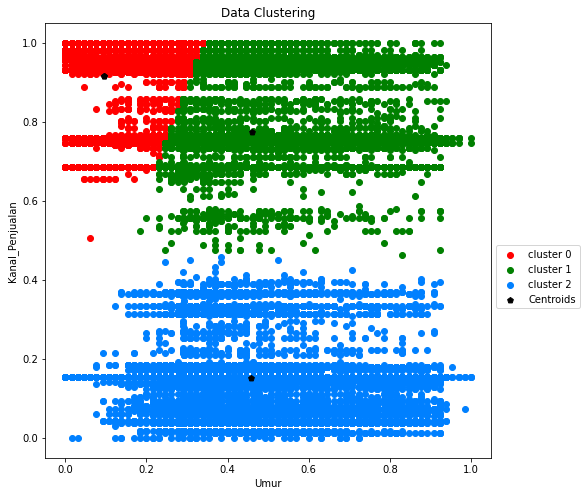

In [58]:
colors = ['r', 'g', '#0080FF', '#e69500', '#e89500']

plt.figure(figsize=(8,8))
plt.title('Data Clustering')

for i in range(k):
  plt.scatter(
    df_hasil['Umur'][df_hasil['Cluster'] == i],
    df_hasil['Kanal_Penjualan'][df_hasil['Cluster'] == i],
    color=colors[i],
    label=f'cluster {i}'
  )

  plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p')

plt.scatter(centroid[0][0], centroid[0][1], color='k', label='Centroids', marker='p')

plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## Evaluasi Model

### Elbow Method

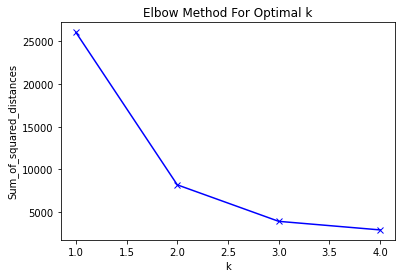

In [66]:
# # Menentukan nilai SSE terlebih dahulu
# def sse(df,centroid):
#   sum = 0
#   for i in range(len(centroid)):
#     j = i+1
    
#     k = df[(df['Cluster'] == j)]['{}'.format(j)]**2
#     sum += k.sum()
#   return sum

# # Menentukan nilai WCSS
# wcss = []
# data = df.to_numpy()
# for i in range(1,2): 
#   centroid, cluster = kMeans(i+1, 12, data)
#   df_hasil = convDf(cluster)
#   print(df_hasil.sample(5))
#   wcss.append(sse(df_hasil, centroid))
#   print('K=',i+1,'| Distortion: ',wcss[i])

# # Visualization
# plt.plot(range(1, 6), wcss, '-bx')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

SS_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SS_distances.append(km.inertia_)

plt.plot(K, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()